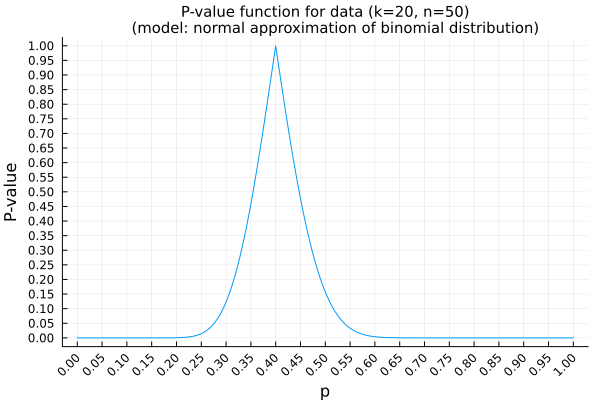

In [1]:
using Distributions
using StatsPlots
default(fmt=:png, titlefontsize=10)
safediv(x, y) = x == 0 ? zero(x/y) : x/y

function pvalue_binomial_wilson(k, n, p)
    phat, sehat = k/n, √(p * (1 - p) / n)
    z = safediv(phat - p, sehat)
    2ccdf(Normal(), abs(z))
end

k, n = 20, 50
plot(p -> pvalue_binomial_wilson(k, n, p), 0, 1; label="")
plot!(xtick=0:0.05:1, ytick=0:0.05:1, xrotation=45)
plot!(xguide="p", yguide="P-value")
title!("P-value function for data (k=$k, n=$n)
    (model: normal approximation of binomial distribution)")

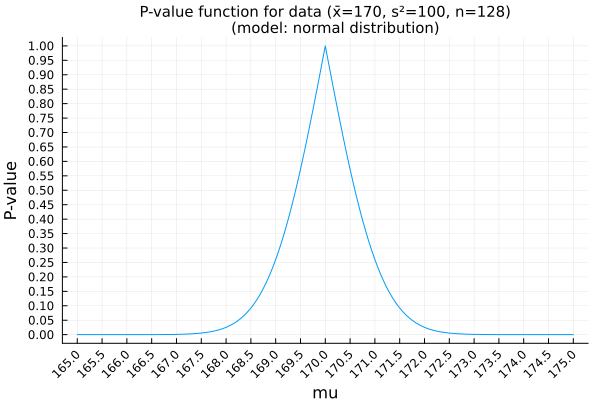

In [2]:
using Distributions
using StatsPlots
default(fmt=:png, titlefontsize=10)
safediv(x, y) = x == 0 ? zero(x/y) : x/y

function pvalue_onesample_t_test(xbar, s2, n, mu)
    t = safediv(xbar - mu, √(s2 / n))
    2ccdf(TDist(n - 1), abs(t))
end

xbar, s2, n = 170, 10^2, 128
plot(mu -> pvalue_onesample_t_test(xbar, s2, n, mu), 165, 175; label="")
plot!(xtick=0:0.5:200, ytick=0:0.05:1, xrotation=45)
plot!(xguide="mu", yguide="P-value")
title!("P-value function for data (x̄=$xbar, s²=$s2, n=$n)
    (model: normal distribution)")